### Linear Regression
    (preiliminary : Linear model)
    Y= F(x) + b
    Xi = [x0, x2, ... , xn]
    
    Yi = W0X0 + W1X1 + ... + WnXn = WX

1. Library and Data, Preprocessing
2. Compute W and b with 4 methods
3. [Advanced] Regularization : Ridge, Lasso

### Library

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

### Simple Data

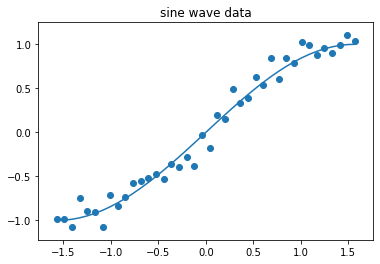

In [2]:
plt.figure()

# True data
N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N,1) # 40 x 1
y = np.sin(X)

plt.plot(X,y)
# add noise
y +=0.1*np.random.randn(N,1)

plt.scatter(X,y)
plt.title('sine wave data')
plt.show()

# Make feature

In [3]:
n_feature = 2

PHI = np.ones(X.shape[0]).reshape(-1,1) # 40 x 1
# 100개가 있을 때 100x1 을 만들고 싶을 때 -1,1을 써주면 알아서 -1 쪽을 계산해준다.
for i in range(1, n_feature):
    PHI = np.concatenate((PHI, np.power(X,i)), axis=1) # power : x의 i승 계산
print("PHI.shape", PHI.shape)
print("PHI[:3]\n", PHI[:3])

# shuffle
idx = np.random.permutation(N) # N부터 40까지 섞어서 idx로 사용함.
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape (40, 2)
PHI[:3]
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


# Split train / test dataset

In [4]:
n = N-20

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

# test data
X_test = shuffle_X[:]
PHI_test = shuffle_PHI[:]
y_test = shuffle_y[:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.          0.12083049]
 [ 1.          0.68470609]
 [ 1.         -0.44304512]
 [ 1.         -0.60415243]
 [ 1.         -0.12083049]
 [ 1.         -0.2819378 ]
 [ 1.         -0.68470609]
 [ 1.          1.40968901]
 [ 1.         -1.49024267]
 [ 1.         -1.2485817 ]
 [ 1.         -1.00692072]
 [ 1.          0.60415243]
 [ 1.         -1.40968901]
 [ 1.          1.16802804]
 [ 1.         -0.36249146]
 [ 1.         -0.20138414]
 [ 1.          0.36249146]
 [ 1.         -1.08747438]
 [ 1.         -0.92636706]
 [ 1.          0.76525975]]
(20, 2)
[[ 1.          0.12083049]
 [ 1.          0.68470609]
 [ 1.         -0.44304512]
 [ 1.         -0.60415243]
 [ 1.         -0.12083049]
 [ 1.         -0.2819378 ]
 [ 1.         -0.68470609]
 [ 1.          1.40968901]
 [ 1.         -1.49024267]
 [ 1.         -1.2485817 ]
 [ 1.         -1.00692072]
 [ 1.          0.60415243]
 [ 1.         -1.40968901]
 [ 1.          1.16802804]
 [ 1.         -0.36249146]
 [ 1.         -0.20138414]
 [ 1.          0.36

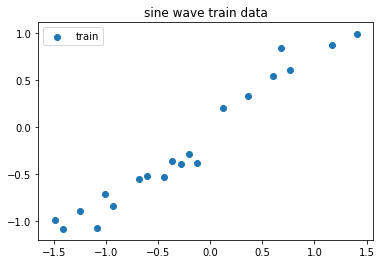

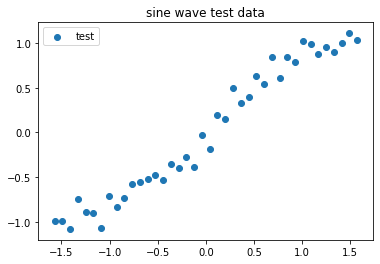

In [5]:
# plot
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

# Linear Regression (Formula)

## method 1 : compute W and b with numpy

In [6]:
# compute W_ with PHI_train
# numpy @ 는 행렬 곱을 의미한다.
# 각 데이터는 행으로 표현되기 때문에 inverse를 해야된다.
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
print('[b, W] = W_')
print("W_.shape: ", W_.shape)
print("W_ \n", W_)

[b, W] = W_
W_.shape:  (2, 1)
W_ 
 [[-0.02224552]
 [ 0.7895385 ]]


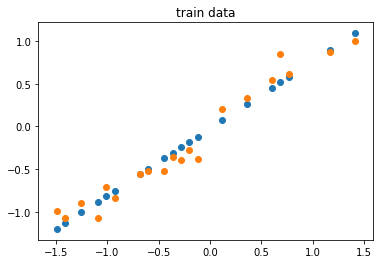

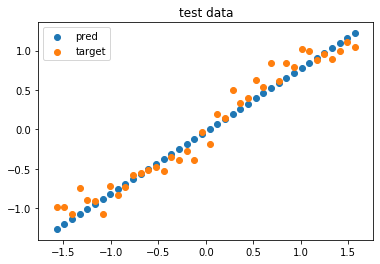

In [7]:
plt.figure()
plt.scatter(X_train, PHI_train @ W_, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()


# Linear Regression (Formula)

## method 2 : compute W and b with sklearn library

In [8]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print("b: ", reg.intercept_)
print("W: ", reg.coef_)

b:  [-0.02224552]
W:  [[ 0.7895385]]


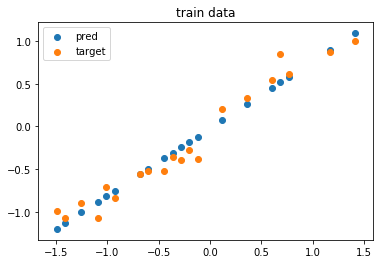

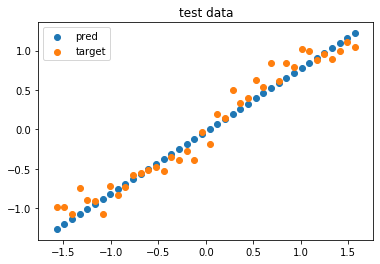

In [10]:
plt.figure()
plt.scatter(X_train, reg.predict(X_train), label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula)

## method 3 : compute W and b with tensorflow library (basic)

In [11]:
tf.reset_default_graph() # 남아있는 computational graph사용 안함
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None,1])

# train with PHI_train, so w shape is [n_feature, 1]
w = tf.get_variable("w", [n_feature,1])

# train without bias. (PHI_train term have 1, have bias already.)
y_pred = tf_PHI @ w


# We use MSE as Loss function
loss = tf.reduce_mean(tf.reduce_sum(tf.pow(tf_y-y_pred,2), axis=1))

optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(optimizer, feed_dict={tf_PHI:PHI_train, tf_y:y_train})
        
    print('[b, W]: ', sess.run(w))
    y_train_pred = sess.run(y_pred, feed_dict={tf_PHI: PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict = {tf_PHI:PHI_test})

[b, W]:  [[-0.02224685]
 [ 0.78953636]]


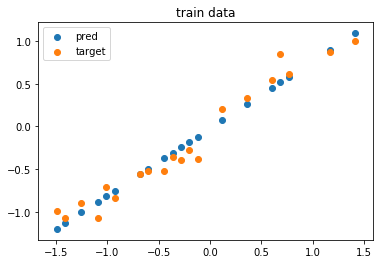

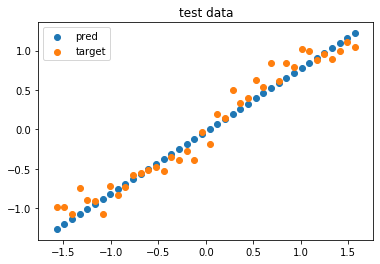

In [12]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Formula)
## method 4 : compute W and b with tensorflow library (intermediate)

In [17]:
import tensorflow as tf
tf.reset_default_graph()
tf_PHI = tf.placeholder(tf.float32, [None, n_feature])
tf_y = tf.placeholder(tf.float32, [None, 1])

y_pred = tf.layers.dense(tf_PHI, 1)

loss = tf.losses.mean_squared_error(tf_y, y_pred)
optimizer = tf.train.GradientDescentOptimizer(1e-1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(100):
        sess.run(optimizer, feed_dict={tf_PHI:PHI_train, tf_y:y_train})
        
    y_train_pred = sess.run(y_pred, feed_dict={tf_PHI:PHI_train})
    y_test_pred = sess.run(y_pred, feed_dict={tf_PHI:PHI_test})

In [19]:
print(y_train_pred)
print(y_test_pred)

[[ 0.07315454]
 [ 0.51835573]
 [-0.37204662]
 [-0.49924698]
 [-0.11764595]
 [-0.24484631]
 [-0.56284714]
 [ 1.09075725]
 [-1.19884884]
 [-1.0080483 ]
 [-0.81724775]
 [ 0.45475554]
 [-1.13524866]
 [ 0.8999567 ]
 [-0.30844644]
 [-0.18124613]
 [ 0.26395506]
 [-0.88084793]
 [-0.75364769]
 [ 0.58195585]]
[[ 0.07315454]
 [ 0.51835573]
 [-0.37204662]
 [-0.49924698]
 [-0.11764595]
 [-0.24484631]
 [-0.56284714]
 [ 1.09075725]
 [-1.19884884]
 [-1.0080483 ]
 [-0.81724775]
 [ 0.45475554]
 [-1.13524866]
 [ 0.8999567 ]
 [-0.30844644]
 [-0.18124613]
 [ 0.26395506]
 [-0.88084793]
 [-0.75364769]
 [ 0.58195585]
 [ 0.00955439]
 [-0.0540458 ]
 [-1.26244903]
 [ 0.83635652]
 [ 0.77275634]
 [ 0.39115539]
 [ 0.70915616]
 [-1.07164848]
 [-0.6900475 ]
 [-0.4356468 ]
 [-0.94444811]
 [ 1.02715695]
 [ 0.32755521]
 [ 1.21795762]
 [ 0.20035487]
 [ 0.96355689]
 [-0.62644732]
 [ 0.64555603]
 [ 1.15435743]
 [ 0.13675471]]


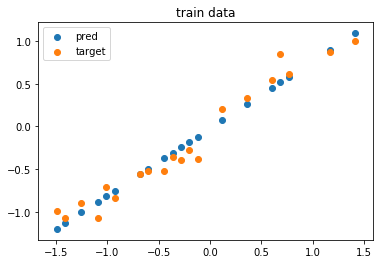

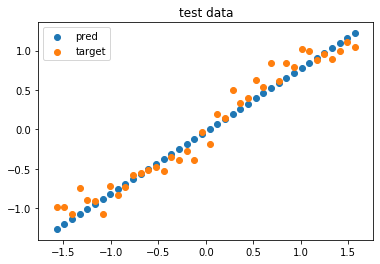

In [20]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()